<a href="https://colab.research.google.com/github/Angelo254/Nairobi-Hospital-Project-to-test-for-Hypothyroidism/blob/master/Moringa_Data_Science_Core_W8_Independent_Project_2021_10_Angelo_Sang_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nairobi Hospital Project to test for Hypothyroidism:
Using Decision Trees and Support Vector Machines to Build a model that determines whether or not a patient's symptoms indicate that the patient has hypothyroidism or not.

### a) Defining the Question

As a Data Scientist, I have been recruited to work for Nairobi Hospital which is a private hospital in Kenya. I have been tasked to create a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroidism or not.

### b) Defining the Metric for Success
This project will be successful when:

1)We Identify the most crucial independent variables that affect Hypothyroidism. 

2)The model achieves atleast 80% accuracy

3)Have the lowest RMSE score possible


### c) Understanding the context: Factors that increase the risk for hypothyroidism

* Being a woman

* Are older than 60

* Have a family history of thyroid disease

* Have an autoimmune disease, such as type 1 diabetes or celiac disease

* Have been treated with radioactive iodine or anti-thyroid medications

* Received radiation to your neck or upper chest

* Have had thyroid surgery (partial thyroidectomy)

* Have been pregnant or delivered a baby within the past six months

### d)Experimental Design
* The project was undertaken using the following design
Datasets(hypothyroid.csv)

* Exploratory Data Analysis

* Data Cleaning

* Univariate Analysis

* Bivariate Analysis

* Multivariate Analysis

* Modelling

    - Decision Trees: 
        Random Forests , Ada Boosted Trees , Gradient Boosted Trees

    - Support Vector Machines: 
        Kernel = polynomial , linear , rbf

* Conclusion

### e) Data Relevance
The relavance of our data will be answered by the following questions.

* How accurate is the data at predicting whether a patient has hypothyroidism or not?

* Was the dataset sufficient?

* Was the data biased?

* Is the data source a reliable source?

## 2. Importing the libraries

In [425]:
#loading the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading the data

In [426]:
#loading the dataset and previewing the first five elements
hypothyroid = pd.read_csv('/content/hypothyroid.csv')
hypothyroid.head(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [427]:
#obtaining information about the dataset
hypothyroid.info()
#the data has 20 columns and 3162 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [428]:
#describing the data.
hypothyroid.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


There are no null values in the data but there is a special character   ' ? '. We cannot perform any analysis on the data thus we replace the special character with zeros.

##Data Cleaning

###Missing Values

In [429]:
#checking the number of missing values 
#there are 5329 missing values in the dataset
hypothyroid_1 = hypothyroid.replace(['?'], np.nan)
hypothyroid_1.isnull().sum().sum()

5329

In [430]:
#viewing the null values per column
hypothyroid_1.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [431]:
# Checking the unique values in each column
# Using a for loop to iterate through the dataframe, 
# finding the unique values in each column then print them out 
#
#

for column in hypothyroid_1.columns:           # Iterating through each column in the dataframe
  print(column)                                # Printing the column name
  print(hypothyroid_1[column].unique())        # Printing out the unique values in each column
  print(hypothyroid_1[column].nunique())       # Printing out the number of unique values in each column
  print('\n............................')      # Creating a new line filled with . to separate the columns

status
['hypothyroid' 'negative']
2

............................
age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' nan '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
92

............................
sex
['M' 'F' nan]
2

............................
on_thyroxine
['f' 't']
2

............................
query_on_thyroxine
['f' 't']
2

............................
on_antithyroid_medication
['f' 't']
2

............................
thyroid_surgery
['f' 't']
2

............................
query_hypothyroid
['f' 't']
2

............................
query_hyperthyroid
['f' 't']
2

............................
pregnant
['f' 't']


From the above code, we can see that,


Numerical columns = [ ' age ' , ' TSH ' , ' T3 ' , ' TT4 ' , ' T4U ' , ' FTI ' , ' TBG ' ]

Categorical columns = [ ' sex ' , ' on_thyroxine ' ,' query_on_thyroxine ' ,' on_antithyroid_medication ' , ' thyroid_surgery ' , ' query_hypothyroid ' , ' query_hyperthyroid ' , ' pregnant ' , 'sick ' , ' tumor ', ' lithium ' , ' goitre ' , ' TSH_measured ', ' T3_measured ' , ' TT4_measured ' , ' T4U_measured ' , ' FTI_measured' , ' TBG_measured ' ]

In [432]:
#changing the column datatypes
# Changing the columns dtypes so that we can impute them
# Creating two lists, 
# An array of numerical columns
# An array of categorical columns

#creating a copy
hypothyroid_2 = hypothyroid_1

#categorical columns array
categorical_columns = ['sex', 'on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
                       'thyroid_surgery','query_hypothyroid','query_hyperthyroid', 'pregnant',
                       'sick','tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured', 
                       'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']

#numerical columns array 
numerical_columns = ['age','TSH','T3', 'TT4', 'T4U', 'FTI' , 'TBG']


# Using a conditional for loop to convert each columns into the right data types

for column in hypothyroid_2.columns:
  if column in numerical_columns:
    hypothyroid_2[column]= pd.to_numeric(hypothyroid_2[column])
  
  else:
    hypothyroid_2[column] = hypothyroid_2[column].astype('category')
    
    
# checking the data types to confirm changes

hypothyroid_2.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

#### TBG column

In [433]:
#creating a copy and dropping the TBG column since it has too many null values which
#means that it does not give any meaningful information. 
hypothyroid_3 = hypothyroid_2.drop(['TBG'], axis =1)
hypothyroid_3.head(5)
hypothyroid_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   status                     3163 non-null   category
 1   age                        2717 non-null   float64 
 2   sex                        3090 non-null   category
 3   on_thyroxine               3163 non-null   category
 4   query_on_thyroxine         3163 non-null   category
 5   on_antithyroid_medication  3163 non-null   category
 6   thyroid_surgery            3163 non-null   category
 7   query_hypothyroid          3163 non-null   category
 8   query_hyperthyroid         3163 non-null   category
 9   pregnant                   3163 non-null   category
 10  sick                       3163 non-null   category
 11  tumor                      3163 non-null   category
 12  lithium                    3163 non-null   category
 13  goitre                     3163 n

In [434]:
#replace the null values in the age column with the mean age
#creating a copy
hypothyroid_4 = hypothyroid_3
hypothyroid_4['age']= hypothyroid_3['age'].fillna(hypothyroid_3['age'].mean(), axis = 0)

In [435]:
#replace the null values in the sex column with the modal value
#creating a copy
hypothyroid_5 = hypothyroid_4
hypothyroid_5['sex']= hypothyroid_4['sex'].fillna(hypothyroid_4['sex'].mode(), axis = 0)

Replacing the rest of the null values with zeros

In [436]:
#The null values are in all the numerical column
#defining the array of numerical columns to use.
numerical_columns_2 = ['TSH','T3', 'TT4', 'T4U', 'FTI']

#creating a copy
hypothyroid_6 = hypothyroid_5

#dropping the null values and assigning the resultant values to a new dataframe
hypothyroid_6[numerical_columns_2] = hypothyroid_5[numerical_columns_2].fillna(0)
hypothyroid_6[numerical_columns_2].head()

,TSH,T3,TT4,T4U,FTI
0,30.0,0.6,15.0,1.48,10.0
1,145.0,1.7,19.0,1.13,17.0
2,0.0,0.2,4.0,1.00,0.0
3,430.0,0.4,6.0,1.04,6.0
4,7.3,1.2,57.0,1.28,44.0


###Duplicates

In [437]:
#obtainging the number of duplicated rows in the data
#There are 152 duplicates
hypothyroid_6.duplicated().sum()

152

There are 152 duplicates thus we drop them!

In [438]:
#dropping the duplicates
#creating a copy
hypothyroid_7 = hypothyroid_6.drop_duplicates()
hypothyroid_7.shape

(3011, 25)

# Univariate Analysis

## Status column
This is the dependent variable which we are trying to predict.

The status column is binary where [ ' Hypothyroid ' ] indicates that the patient is sick

while [ ' negative ' ] indicates that the patient is healthy.

In [439]:
#['hypothyroid', 'negative']
hypothyroid_7.status.describe()

count         3011
unique           2
top       negative
freq          2870
Name: status, dtype: object

###Age
This column indicates the age of the patients

In [440]:
#checking for null values
hypothyroid_6.age.isnull().sum()

0

In [441]:
hypothyroid_6.age.nunique() 
#[93] There are 93 unique ages

93

In [442]:
hypothyroid_6.age.unique()
#The unique values are:

array([72.        , 15.        , 24.        , 77.        , 85.        ,
       64.        , 20.        , 42.        , 69.        , 75.        ,
       53.        , 59.        , 68.        , 50.        , 78.        ,
       65.        , 28.        , 43.        , 40.        , 84.        ,
       51.15421421, 83.        , 63.        , 73.        , 36.        ,
       27.        , 48.        , 71.        , 60.        , 34.        ,
       79.        , 62.        , 74.        , 32.        , 41.        ,
       70.        , 29.        ,  5.        , 58.        , 35.        ,
       51.        , 22.        , 16.        , 44.        , 39.        ,
       47.        , 18.        , 17.        , 88.        , 56.        ,
       30.        , 45.        , 66.        , 52.        , 54.        ,
       80.        , 33.        , 38.        , 92.        , 67.        ,
       46.        , 13.        , 89.        , 61.        , 49.        ,
       26.        , 57.        , 31.        , 90.        , 81.  

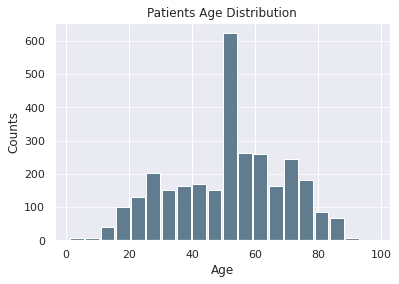

In [443]:
#visualizing age distribution
size, scale = 1000, 10
age = hypothyroid_7['age']

age.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Patients Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

The distribution is fairly normal, and leptokurtic: the kurtosis is greater than normal.

The distribution is more concentrated around the mean

Text(0.5, 1.0, 'Boxplot of Age')

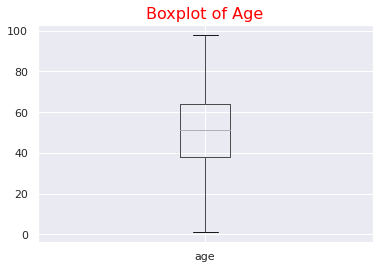

In [444]:
#checking for outliers using a boxplot
hypothyroid_7.boxplot(column=['age'])
plt.title("Boxplot of Age",fontsize=16,color="red")

There are no outliers in the data.

###Sex
This column gives the gender of the patients in the dataset

In [445]:
hypothyroid_7.sex.nunique()
#there are 30 unique values
hypothyroid_7.sex.describe()

count     2938
unique       2
top          F
freq      2049
Name: sex, dtype: object

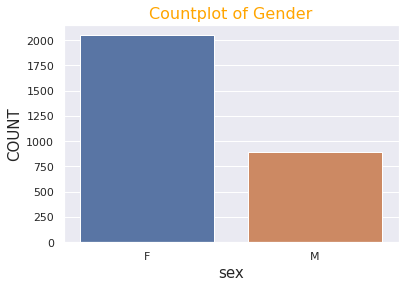

In [446]:
#visualizing the distribution of gender in the dataset
sns.countplot('sex',data = hypothyroid_7)
plt.xlabel("sex",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of Gender",fontsize=16,color="orange")
plt.show()
#

The female patients entries are more than double that of male patients: This may be because women are more prone to hypothyroidism than men.

## Other Numerical Columns: TSH  ,  T3  , TT4  ,  T4U  ,  FTI 

#####Histograms

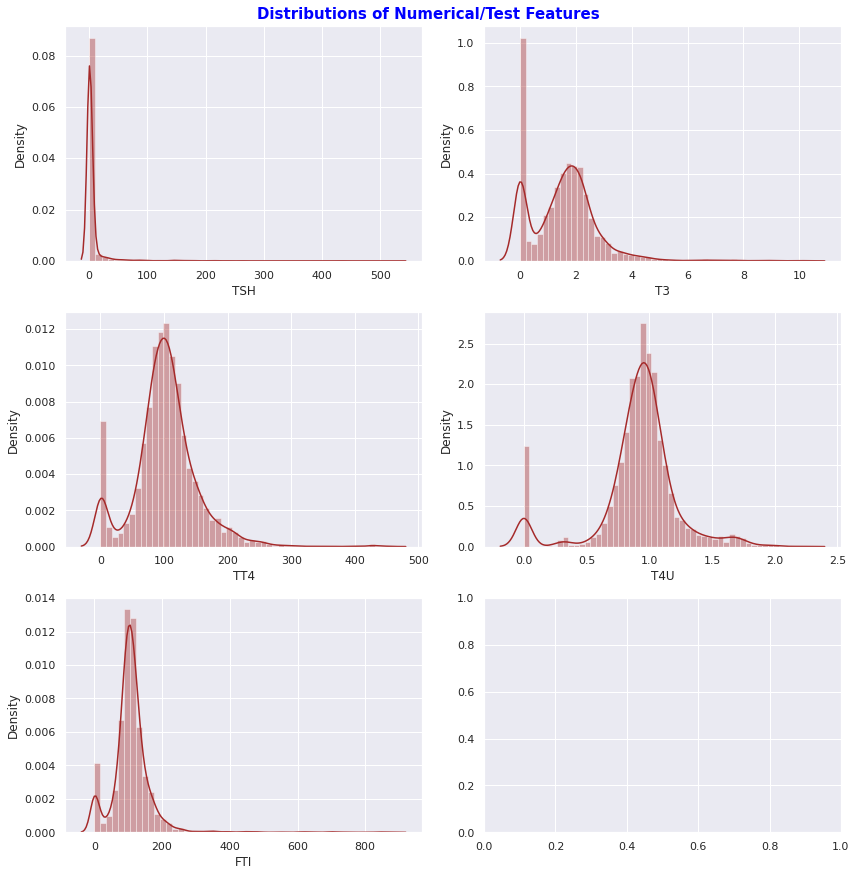

In [447]:
# Histograms of the numerical columns
# these columns represent the measures of the thyroid tests.

# First we create an array of the numerical columns
numerical_columns_3 = ['TSH','T3','TT4','T4U','FTI']

#visualizing the distributions using histograms
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=3, ncols = 2, figsize = (12, 12))
fig.suptitle('Distributions of Numerical/Test Features', y= 1.01, color = 'blue', fontsize = 15, weight = 'bold')

for ax, data, name in zip(axes.flatten(), hypothyroid_7, numerical_columns_3):
  sns.distplot(hypothyroid_7[name], ax = ax, kde = True, color = 'brown')
plt.tight_layout()
plt.show()

TSH, T3,TT4, and FT Columns are right skewed.

#####Box Plots

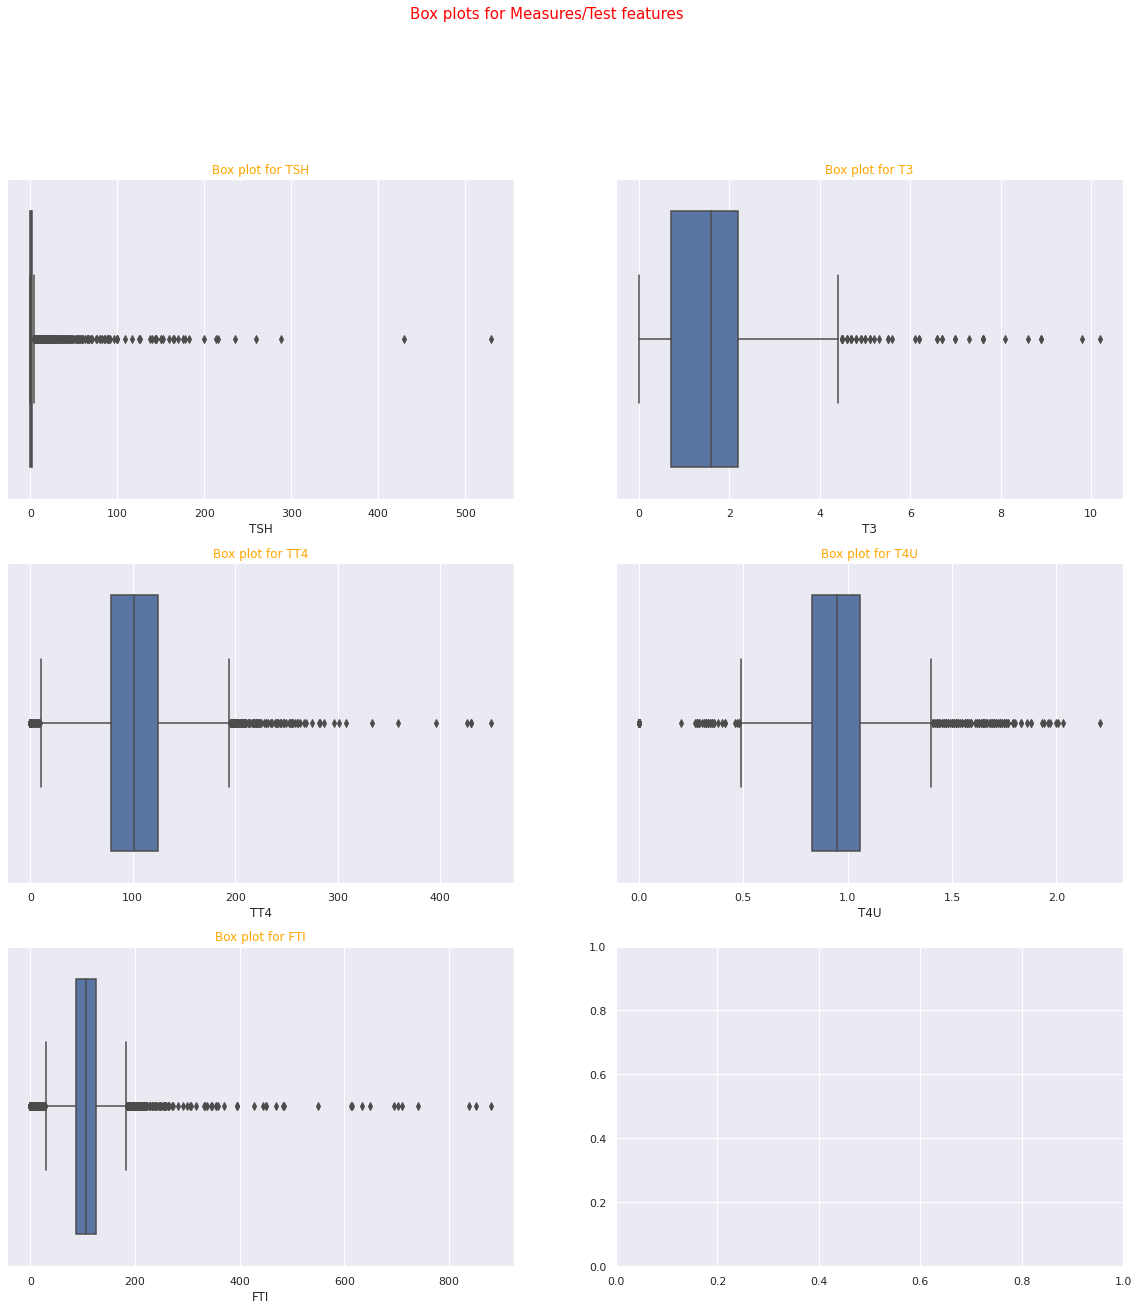

In [448]:
# We will use a boxplot to check for outliers
# we will use the list of measures/tests earlier created

# Specifying the chart we will use to plot the boxplots
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 20))

# labeling the title
fig.suptitle('Box plots for Measures/Test features', y= 1, color = 'red', fontsize = 15)

sns.set(style = 'whitegrid', context = 'notebook')

# Using a for loop to iterate through the measured list and plot respective boxplots
for ax, data, name in zip(axes.flatten(), hypothyroid_7, numerical_columns_3):
  sns.boxplot(hypothyroid_7[name], ax = ax)
  ax.set_title('Box plot for '+ name, color='orange')
  
plt.show()


There are outliers in the numerical columns, we will not drop them but instead use them for modelling.

##Other Categorical Columns:

#####Countplots

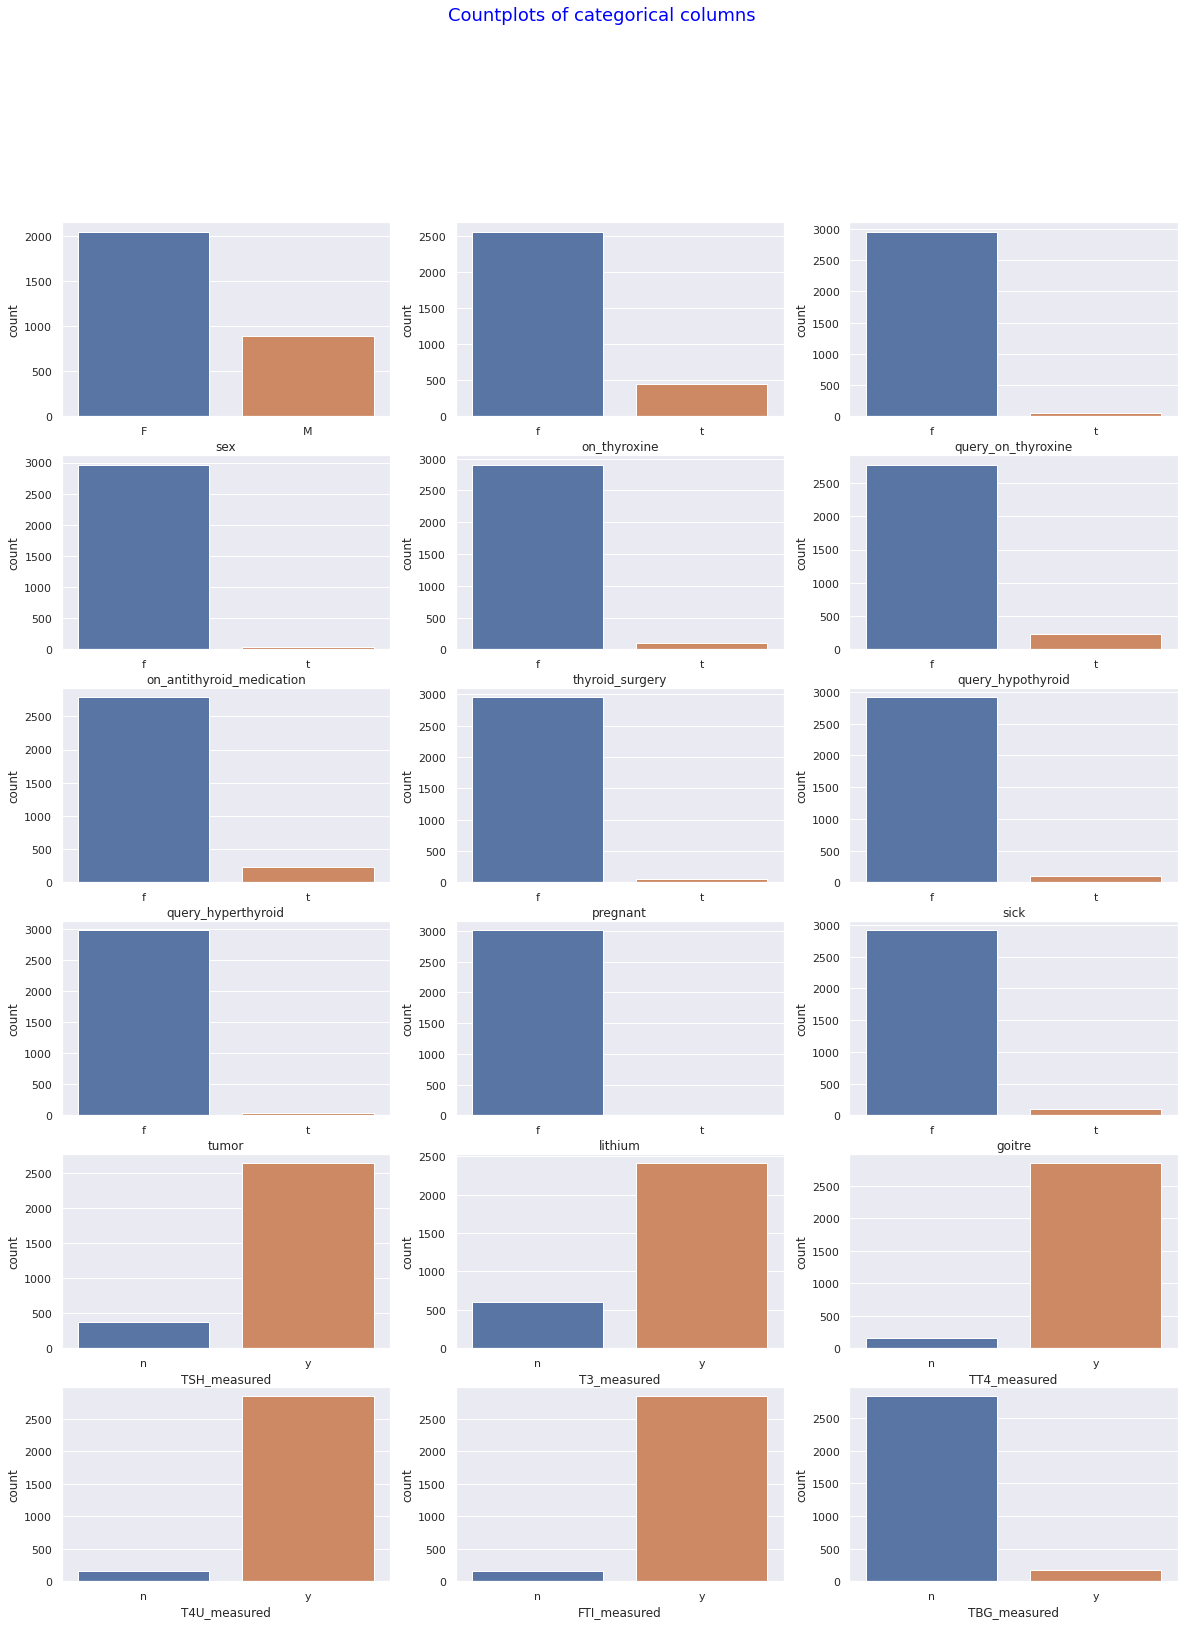

In [449]:
# Countplot of categorical columns in the dataset
# creating a list of the categorical columns in the dataset

categorical_columns_1 =[ 'sex', 'on_thyroxine', 'query_on_thyroxine',
      'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
      'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
      'TSH_measured', 'T3_measured', 'TT4_measured',
      'T4U_measured', 'FTI_measured', 'TBG_measured']


sns.set(style = 'darkgrid', context = 'notebook')
corr = hypothyroid_7.corr()
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20,25))
plt.suptitle('Countplots of categorical columns', fontsize = 18, y = 1, color = 'blue')
for ax, data, column in zip(axes.flatten(), hypothyroid_7, categorical_columns_1):
   sns.countplot(hypothyroid_7[column], ax=ax)

# Bivariate Analysis

## Checking for Multi-collinearity

In [450]:
# Let's display the correlations between the variables
corr = hypothyroid_7.corr()
corr

,age,TSH,T3,TT4,T4U,FTI
age,1.000000,0.008882,-0.092772,-0.024667,-0.063006,0.057734
TSH,0.008882,1.000000,-0.092486,-0.242139,0.089875,-0.199480
T3,-0.092772,-0.092486,1.000000,0.463470,0.417634,0.290009
TT4,-0.024667,-0.242139,0.463470,1.000000,0.546467,0.738844
T4U,-0.063006,0.089875,0.417634,0.546467,1.000000,0.100747
FTI,0.057734,-0.199480,0.290009,0.738844,0.100747,1.000000


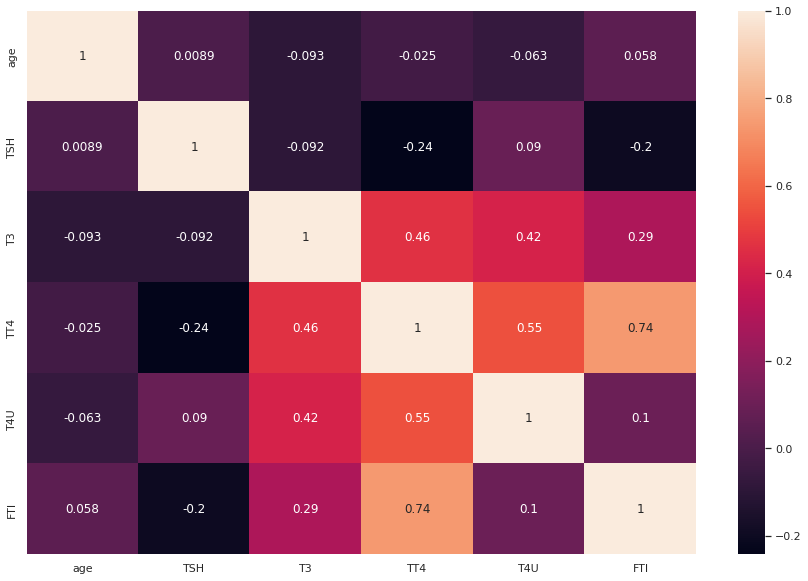

In [451]:
#visualizing correlation on a heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True)
plt.show()

The heat map above shows that the values are very close to 0 meaning that there is very little multi-collinearity.

#Multi-Variate Analysis

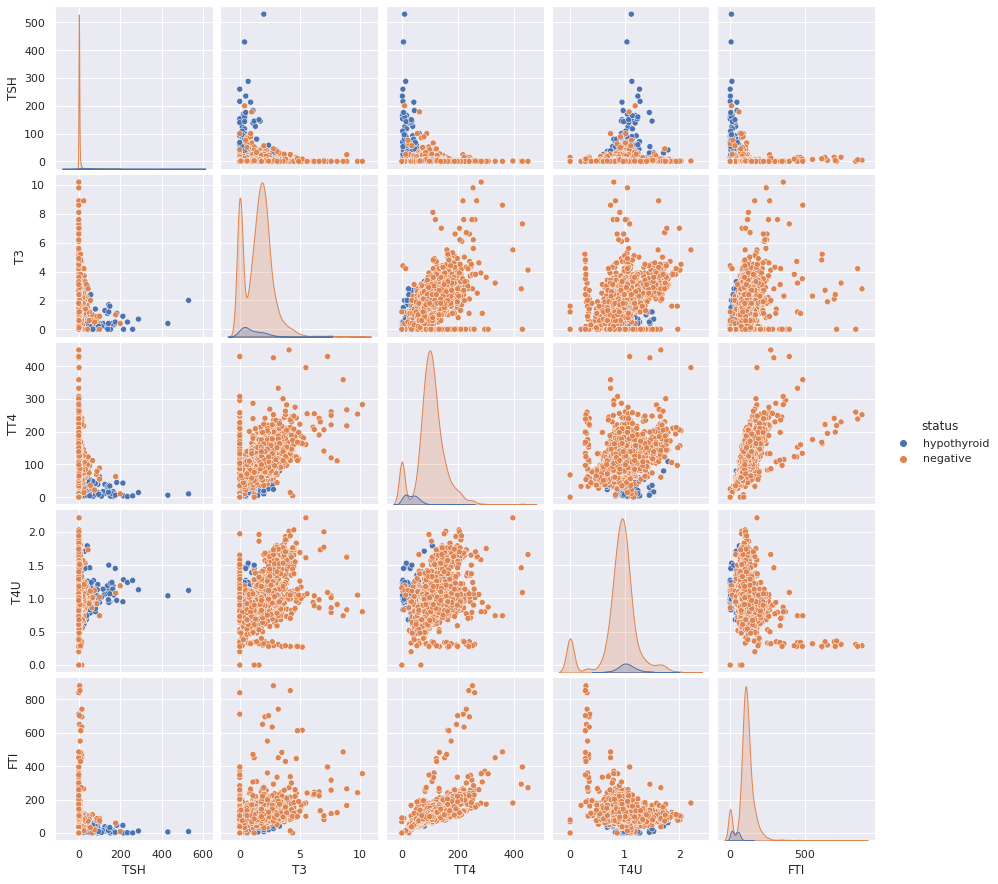

In [452]:
# A pairplot
# Here we want visualize scatter plots of features with the argument 'hue' 
# to distinguish when the condition (hpyothyroidism) is negative or postive

measure_columns = ['TSH','T3','TT4','T4U','FTI']

sns.pairplot(hypothyroid_4, kind="scatter", diag_kind="kde", vars=measure_columns, hue="status")
plt.show()


In [453]:
hypothyroid_7.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')

#####PCA

In [454]:
#Finding the best principal Components
from sklearn.decomposition import PCA

np.random.seed(0)

X = hypothyroid_7.drop('status', axis=1)

X = pd.get_dummies(X)

train_features = X

model = PCA(n_components=10).fit(train_features)

# number of components
n_pcs= model.components_.shape[0]
# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = [ 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query3hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured']
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
# build the dataframe
df = pd.DataFrame(dic.items())
df

,0,1
0,PC0,thyroid_surgery
1,PC1,query_on_thyroxine
2,PC2,sex
3,PC3,age
4,PC4,on_thyroxine
5,PC5,query_hyperthyroid
6,PC6,query3hypothyroid
7,PC7,pregnant
8,PC8,T3
9,PC9,TT4


The dataframe above shows 10 features that explain the most variance in the data.

# Modelling


####The Baseline Model: Logistic Regression

In [455]:
from sklearn.linear_model import LogisticRegression

y = hypothyroid_7.status.cat.codes
# Split the independent and dependent variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

y_pred = LogReg.predict(X_test)


In [456]:
print('accuracy_score:',accuracy_score (y_test , y_pred))
print('\n','F1_score, average = micro:',f1_score(y_test, y_pred, average='micro'))
print('\n','F1_score, average = macro:',f1_score(y_test, y_pred, average='macro'))
print('\n','F1_score, average = weighted:',f1_score(y_test, y_pred, average='weighted'))
print('\n')
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

accuracy_score: 0.9856194690265486

 F1_score, average = micro: 0.9856194690265486

 F1_score, average = macro: 0.8992515881248555

 F1_score, average = weighted: 0.9853099067294102




array([[ 27,   8],
       [  5, 864]])

The Baseline Model has an accuracy score of 98% as seen from the F1 score. 

We only check the micro and weighted scores since

micro:
    Calculates metrics globally by counting the total true positives, false negatives and false positives.

macro:
    Calculates metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

weighted:
    Calculates metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

##1st Approach: Decision Trees

####Random forests

In [457]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [458]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth

forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 10, max_depth=5)

forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.head(5)

,Actual,Predicted
2141,1,1
566,1,1
2714,1,1
2600,1,1
1941,1,1


In [459]:
from sklearn.metrics import f1_score
print("R2 score : %.2f" % r2_score(y_test,y_pred))

print('accuracy_score:',accuracy_score (y_test , y_pred))

#computing the F1 score since the data is unbalanced
print('F1_score, average = micro:',f1_score(y_test, y_pred, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, y_pred, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, y_pred, average='weighted'))


R2 score : 0.70
accuracy_score: 0.9889380530973452
F1_score, average = micro: 0.9889380530973452
F1_score, average = macro: 0.9164911502789788
F1_score, average = weighted: 0.9882497214791185


In [460]:
# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.011061946902654867
Mean Squared Error: 0.011061946902654867
Root Mean Squared Error: 0.10517579047791781


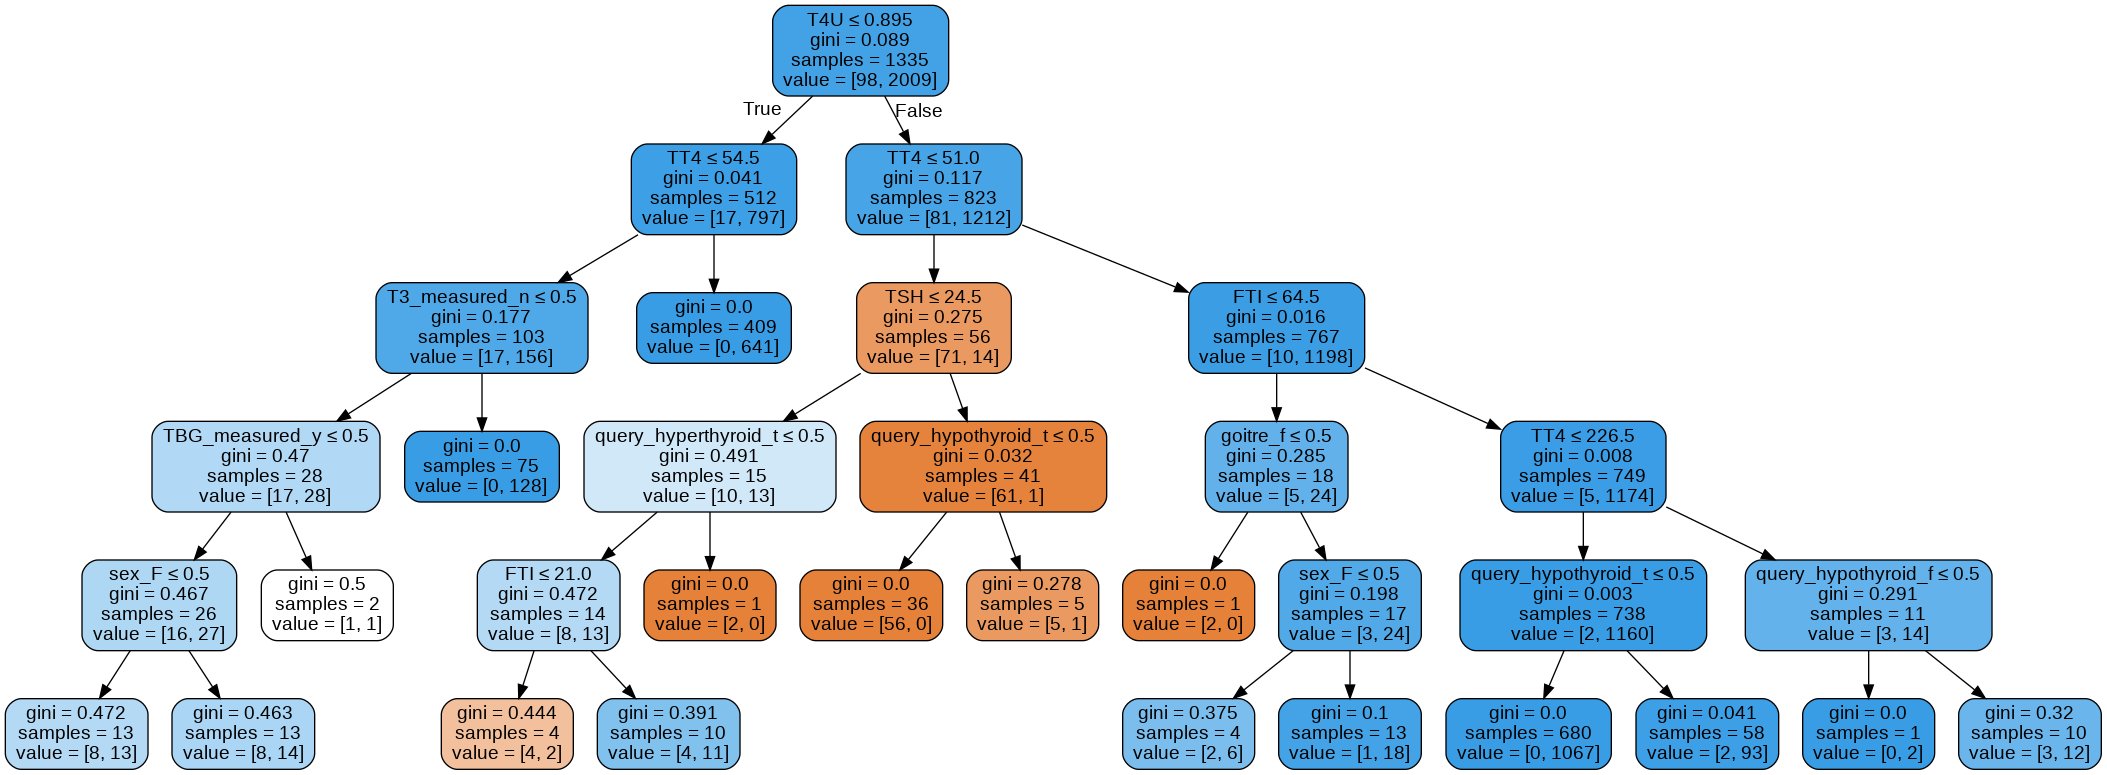

In [461]:
#Visualizing tree number 50
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
y_pred = forest.predict(X_test)
dot_data = StringIO()

# picking a specific tree from the forest; tree  number 50
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypothyroid_Test.png')
Image(graph.create_png())

####Ada boosted trees

In [462]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Note that adaboost needs a simple decision tree in its constructor. Again, tweak the max_depth and see how it influences the process
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=300, random_state=5)

ada_boost = ada_boost.fit(X_train, y_train)

y_pred_ada = ada_boost.predict(X_test)

accuracy_score(y_test, y_pred_ada)

0.9944690265486725

In [463]:
print('F1_score, average = micro:',f1_score(y_test, y_pred_ada, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, y_pred_ada, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, y_pred_ada, average='weighted'))

F1_score, average = micro: 0.9944690265486725
F1_score, average = macro: 0.9633494692970719
F1_score, average = weighted: 0.9945063849607393


####gradient boosted trees

In [464]:
#from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
target_number_of_trees = 30

gbc = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.001, max_depth=20)
gbc = gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_test)
accuracy_score(y_test, y_pred_gbc)

0.9612831858407079

In [465]:
from sklearn.metrics import f1_score
print("R2 score : %.2f" % r2_score(y_test,y_pred_gbc))

print('accuracy_score:',accuracy_score (y_test , y_pred_gbc))
print('F1_score, average = micro:',f1_score(y_test, y_pred_gbc, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, y_pred_gbc, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, y_pred_gbc, average='weighted'))

R2 score : -0.04
accuracy_score: 0.9612831858407079
F1_score, average = micro: 0.9612831858407079
F1_score, average = macro: 0.49012972363226165
F1_score, average = weighted: 0.9423069244168925


## 2nd Approach: Support Vector Machines

##### kernel = polynomial

In [466]:
from sklearn.svm import SVC
# Building the model 
polyclassifier = SVC(kernel='poly',degree=15,gamma='auto')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)
poly_pred = polyclassifier.predict(X_test)
accuracy_score(y_test, poly_pred)

0.9612831858407079

In [467]:
print('F1_score, average = micro:',f1_score(y_test, poly_pred, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, poly_pred, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, poly_pred, average='weighted'))

F1_score, average = micro: 0.9612831858407079
F1_score, average = macro: 0.49012972363226165
F1_score, average = weighted: 0.9423069244168925


##### kernel = linear

In [468]:
from sklearn.svm import SVC
# Building the model 
polyclassifier1 = SVC(kernel='linear',degree=15,gamma='auto')
# Training the model using the training set
polyclassifier1.fit(X_train, y_train)
poly_pred1 = polyclassifier1.predict(X_test)
accuracy_score(y_test, poly_pred1)

0.9878318584070797

In [469]:
print('F1_score, average = micro:',f1_score(y_test, poly_pred1, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, poly_pred1, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, poly_pred1, average='weighted'))

F1_score, average = micro: 0.9878318584070797
F1_score, average = macro: 0.9171271178671734
F1_score, average = weighted: 0.9877471820711037


##### kernel = rbf

In [470]:
from sklearn.svm import SVC
# Building the model 
polyclassifier2 = SVC(kernel='rbf',degree=15,gamma='auto')
# Training the model using the training set
polyclassifier2.fit(X_train, y_train)
poly_pred2 = polyclassifier2.predict(X_test)
accuracy_score(y_test, poly_pred2)

0.9601769911504425

In [471]:
print('F1_score, average = micro:',f1_score(y_test, poly_pred2, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, poly_pred2, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, poly_pred2, average='weighted'))

F1_score, average = micro: 0.9601769911504425
F1_score, average = macro: 0.489841986455982
F1_score, average = weighted: 0.9417537305978946


##Challenging the Solution

In [472]:
# to get the most importantfeatures
tree = forest.estimators_[50]

features = X

importances = list(tree.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance 
                       in zip(features, importances)]
# sort in descending order
feature_importances = sorted(feature_importances, key = lambda x: x[1], 
                             reverse = True)
feature_importances
#the list below shows the most important features in the data and the value of how important they are.
# the most important feature is TT4 and it accounts for 79% importance

[('TT4', 0.79),
 ('TSH', 0.07),
 ('T3_measured_n', 0.07),
 ('FTI', 0.02),
 ('goitre_f', 0.02),
 ('T4U', 0.01),
 ('query_hyperthyroid_t', 0.01),
 ('age', 0.0),
 ('T3', 0.0),
 ('sex_F', 0.0),
 ('sex_M', 0.0),
 ('on_thyroxine_f', 0.0),
 ('on_thyroxine_t', 0.0),
 ('query_on_thyroxine_f', 0.0),
 ('query_on_thyroxine_t', 0.0),
 ('on_antithyroid_medication_f', 0.0),
 ('on_antithyroid_medication_t', 0.0),
 ('thyroid_surgery_f', 0.0),
 ('thyroid_surgery_t', 0.0),
 ('query_hypothyroid_f', 0.0),
 ('query_hypothyroid_t', 0.0),
 ('query_hyperthyroid_f', 0.0),
 ('pregnant_f', 0.0),
 ('pregnant_t', 0.0),
 ('sick_f', 0.0),
 ('sick_t', 0.0),
 ('tumor_f', 0.0),
 ('tumor_t', 0.0),
 ('lithium_f', 0.0),
 ('lithium_t', 0.0),
 ('goitre_t', 0.0),
 ('TSH_measured_n', 0.0),
 ('TSH_measured_y', 0.0),
 ('T3_measured_y', 0.0),
 ('TT4_measured_n', 0.0),
 ('TT4_measured_y', 0.0),
 ('T4U_measured_n', 0.0),
 ('T4U_measured_y', 0.0),
 ('FTI_measured_n', 0.0),
 ('FTI_measured_y', 0.0),
 ('TBG_measured_n', 0.0),
 ('TBG_m

In [473]:
#creating a new set of independent variables based on their importance
X1 = pd.get_dummies(hypothyroid_7)

In [474]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=0)

#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
target_number_of_trees = 30

gbc = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.001, max_depth=20)
gbc = gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_test)
accuracy_score(y_test, y_pred_gbc)

0.9612831858407079

Using the 12 best features gives an accuracy score of 96%.

This means using the additional features overfits the data. 

More hyperparameter tuning would therefore increase the accuracy of the model.

## 9. Follow up questions

### a). Did we have the right data?
YES!

### b). Do we need other data to answer our question?
YES! More column descriptions should be included for better bussiness understanding.

#Conclusion

All the models achieved an accuracy score and F1 score greater than 90% percent .


This may mean that,

-> The data was sufficient for training.

-> The data was unbalanced and this caused overfitting.
